# 🚜 Predicting the Sale Price of Bulldozers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [ ]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

## Analyzing the data

In [ ]:
df.info()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [ ]:
df.SalePrice.plot.hist();

In [ ]:
df.saledate[:1000]

In [ ]:
df.saledate = pd.to_datetime(df.saledate)

In [ ]:
df.saledate.dtype

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df["SalePrice"][:1000]);

In [ ]:
df.head()

In [ ]:
df.head().T

In [ ]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp["SaleYear"] = df.saledate.dt.year
df_tmp["SaleYear"].head(20)

df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDay"] = df_tmp.saledate.dt.day
df_tmp["SaleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayofYear"] = df_tmp.saledate.dt.dayofyear

In [ ]:
df_tmp.head().T

In [ ]:
df.head().T

In [ ]:
df.drop(["SaleDay","SaleDayofWeek","SaleDayofYear"], axis=1, inplace=True)

In [ ]:
df_tmp.head().T

In [ ]:
df.columns

## Dealing with Object Datatype

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

## Save Preprocessed Data

In [ ]:
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index=False)

In [2]:
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [4]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   saledate                  412698 non-null  category
 10  fiModelDesc               412698 non-null  category
 11  fiBaseModel               412698 non-null  category
 12  fiSecondaryDesc           271971 non-null  category
 13  fiModelSeries             586

In [5]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

## Splitting the data before Dealing with the missing Values

In [5]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [6]:
df_train = df_tmp[df_tmp["SaleYear"] != 2012]

len(df_train)

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

X_train.shape, y_train.shape

((401125, 56), (401125,))

In [7]:
df_val = df_tmp[df_tmp["SaleYear"] == 2012]

len(df_val)

11573

In [8]:
df_val.SalePrice.isna()

401125    False
401126    False
401127    False
401128    False
401129    False
          ...  
412693    False
412694    False
412695    False
412696    False
412697    False
Name: SalePrice, Length: 11573, dtype: bool

In [12]:
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]
X_valid.shape, y_valid.shape

((11573, 56), (11573,))

In [13]:
y_valid.isna().sum()

0

## Dealing with Missing Values

### filling the numerical values

In [10]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayofWeek
SaleDayofYear


In [11]:
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayofWeek
SaleDayofYear


In [12]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [13]:
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [14]:
len(df_val)

11573

In [15]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_train[label+"_is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())

C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_val[label+"_is_missing"] = pd.isnull(content)
            df_val[label] = content.fillna(content.median())

C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
df_train.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [22]:
df_val.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                               7542
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                         3536
fiModelSeries                           9814
fiModelDescriptor                       8676
ProductSize                             5830
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                            8847
Enclosure                                  9
Forks                                   5935
Pad_Type  

In [18]:
df_train.auctioneerID_is_missing.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

## Filling Categorical Missing Values

In [19]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
df_tmp["state"].cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

In [22]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_train[label+"_is_missing"] = pd.isnull(content)
        df_train[label] = pd.Categorical(content).codes + 1

C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [24]:
df_train.UsageBand_is_missing.unique()

array([ True, False])

In [25]:
df_train.UsageBand.unique()

array([0, 2, 3, 1], dtype=int8)

In [26]:
df_train["UsageBand_is_missing"] = False

C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [32]:
df_val.UsageBand_is_missing.unique()

array([ True, False])

In [33]:
print(df_val[df_val.UsageBand_is_missing==True].head(2))

        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
401125  4449186    46173.2    2318824    26964         173          99.0   
401138  1222837    31000.0     902859     1376         121           3.0   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
401125      1996                       0.0          0         2269  ...   
401138      1000                       0.0          0          683  ...   

        Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
401125                                True                     True   
401138                               False                    False   

        Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
401125              True                        True                     True   
401138             False                       False                    False   

        Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
401125                   

In [30]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_val[label+"_is_missing"] = pd.isnull(content)
        df_val[label] = pd.Categorical(content).codes + 1

C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sidharth-PC\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
pd.Categorical(df_train["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [34]:
df_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Saving the preprocessed Dataset

In [35]:
df_train.to_csv("bluebook-for-bulldozers/df_train.csv", index=False)

NameError: name 'df_test' is not defined

In [36]:
df_val.to_csv("bluebook-for-bulldozers/df_val.csv", index=False)

# Modelling

In [37]:
len(df_train), len(df_val)

(401125, 11573)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
%%time

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
        Calculates Root Mean Squared Log Error
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    score = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return score

Wall time: 0 ns


## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# %%time

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [40]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [42]:
X_train = df_train.drop("SalePrice",axis=1)
y_train = df_train["SalePrice"]
X_valid = df_val.drop("SalePrice",axis=1)
y_valid = df_val["SalePrice"]

In [ ]:
X_valid["auctioneerID_is_missing"] = False

In [44]:
%%time

model.fit(X_train, y_train)

Wall time: 10.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [45]:
show_scores(model)

{'Training MAE': 5562.893759551263,
 'Valid MAE': 7417.047984965005,
 'Training RMSLE': 0.25777925652865674,
 'Valid RMSLE': 0.3061291539528465,
 'Training R^2': 0.86057767637361,
 'Valid R^2': 0.8212979588694195}

## Hyperparameter tuning with RandomizedSearchCV

In [71]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.4min finished


Wall time: 3min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [72]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [73]:
show_scores(rs_model)

{'Training MAE': 6966.923779194304,
 'Valid MAE': 9007.208401624861,
 'Training RMSLE': 0.309580219280527,
 'Valid RMSLE': 0.3677234703703349,
 'Training R^2': 0.7931282394718985,
 'Valid R^2': 0.7543387566742126}

In [76]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid_2 = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model_2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid_2,
                              n_iter=100,
                              cv=5,
                              verbose=True)

rs_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 38.8min finished


Wall time: 38min 55s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [77]:
rs_model_2.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

## Save the model

In [ ]:
import pickle

pickle.dump(ideal_model, open("RandomForestRegressor_using_RandomizedSearchCV.pkl", "wb"))

## Train the model with best hyperparameters obtained from 100 iterations of RandomizedSearchCV

In [46]:
%%time

ideal_model = RandomForestRegressor(n_jobs=-1,
                                    n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=12,
                                    max_features="auto",
                                    max_samples=None,
                                    max_depth=None)

ideal_model.fit(X_train, y_train)

Wall time: 4min 13s


RandomForestRegressor(min_samples_split=12, n_estimators=90, n_jobs=-1)

In [47]:
show_scores(ideal_model)

{'Training MAE': 2646.4265887167617,
 'Valid MAE': 6367.737939238373,
 'Training RMSLE': 0.131855033148019,
 'Valid RMSLE': 0.26164867954678805,
 'Training R^2': 0.9660024047325849,
 'Valid R^2': 0.862092114444781}

## Save the Ideal Model

In [48]:
import pickle

pickle.dump(ideal_model, open("regression_ideal_model_for_predicting_salesPrice.pkl", "wb"))

In [ ]:
# to load the model

loaded_pickle_model = pickle.load(open("regression_ideal_model_for_predicting_salesPrice.pkl", "rb"))

## Predictions on Test Data

In [49]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", 
                       low_memory=False,
                      parse_dates=["saledate"])
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [51]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [52]:
df_test["SaleYear"] = df_test.saledate.dt.year
df_test["SaleMonth"] = df_test.saledate.dt.month
df_test["SaleDay"] = df_test.saledate.dt.day
df_test["SaleDayofWeek"] = df_test.saledate.dt.dayofweek
df_test["SaleDayofYear"] = df_test.saledate.dt.dayofyear

In [53]:
df_test.drop("saledate", axis=1, inplace=True)

In [54]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'SaleYear', 'SaleMonth',
       'SaleDay', 'SaleDayofWeek', 'SaleDayofYear'],
      dtype='object')

In [55]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())

for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes + 1

In [56]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [57]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [58]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [59]:
df_test["auctioneerID"].isna().sum()

0

In [60]:
df_test["auctioneerID_is_missing"]= False

In [61]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing', 'Thumb_is_missing',
       'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
       'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
       'Travel_Controls_is_missing', 'Differential_Type_is_missing',
       'Steering_Controls_is_missing', 'auctioneerID_is_missing'],
      dtype='object', length=102)

In [62]:
test_preds = ideal_model.predict(df_test)

In [63]:
len(test_preds)

12457

In [64]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21986.802794
1,1227844,17983.154814
2,1227847,48907.265568
3,1227848,84685.086958
4,1227863,43457.608420
...,...,...
12452,6643171,61502.094056
12453,6643173,11396.437368
12454,6643184,12155.724975
12455,6643186,18007.418816


In [111]:
df_preds.to_csv("bluebook-for-bulldozers/test_predictions.csv", index=False)

In [65]:
ideal_model.feature_importances_

array([4.77929962e-02, 1.29096010e-02, 3.20006988e-02, 1.96437748e-04,
       3.33241664e-03, 2.69764950e-01, 2.56902608e-03, 9.23669848e-04,
       1.99464705e-02, 7.85191816e-02, 5.32332625e-02, 4.43535742e-03,
       3.33243646e-03, 2.34637587e-01, 4.02651868e-02, 6.58692095e-03,
       1.74367626e-04, 1.66689972e-04, 1.72657189e-03, 8.55157385e-03,
       3.11520721e-04, 2.66750766e-05, 4.48730530e-04, 1.69654525e-04,
       1.45456133e-03, 1.97583111e-05, 2.69597581e-05, 8.88475571e-03,
       1.26468957e-04, 2.18869480e-04, 2.84990485e-03, 3.01998557e-03,
       2.05141798e-03, 3.97993054e-03, 3.58278717e-04, 1.44038799e-03,
       7.30309134e-04, 1.71598852e-02, 5.24548232e-06, 5.11596045e-06,
       1.54418310e-04, 9.44322030e-04, 1.01398219e-03, 5.73309421e-04,
       1.86878761e-04, 3.37307173e-04, 3.09281168e-04, 1.42081054e-03,
       8.27612951e-04, 1.48564846e-04, 1.91114585e-04, 7.68140648e-02,
       1.95717855e-03, 6.42189007e-03, 3.10132578e-03, 1.24645025e-02,
      

In [66]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,
                        "feature_importances":importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    fig, ax= plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

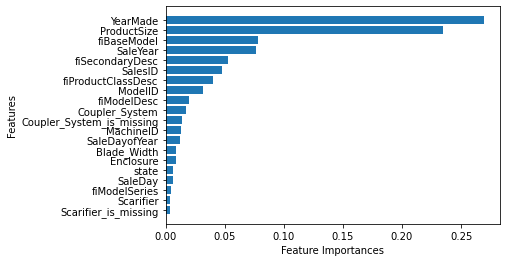

In [67]:
plot_features(X_train.columns, ideal_model.feature_importances_)